In [2]:
# Libraries used.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# To avoid FutureWarning error message. 
import warnings
warnings.filterwarnings('ignore')

#import dataset and view
mb = pd.read_csv('/Users/manasbabbar/Downloads/ALYPredictive/Chocolate (1) (1) (1).csv')


mb.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465


In [3]:
#dataset stat-calculations
mb.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,61.000000,85.000000,82.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.475410,0.478647,0.467195,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.503539,0.282778,0.283934,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.258000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [4]:
#looking at null values if any and datatype
mb.info()
#non-null count also gives us info about null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   Multiple Pieces   61 non-null     float64
 10  sugarpercent      85 non-null     float64
 11  pricepercent      82 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(4), int64(8), object(1)
memory usage: 8.8+ KB


In [6]:
# Dropping columns that are not necessary
mb = mb.drop(["winpercent"], axis = 1)

In [7]:
#Sum of null values
mb.isnull().sum()

competitorname       0
chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
Multiple Pieces     24
sugarpercent         0
pricepercent         3
dtype: int64

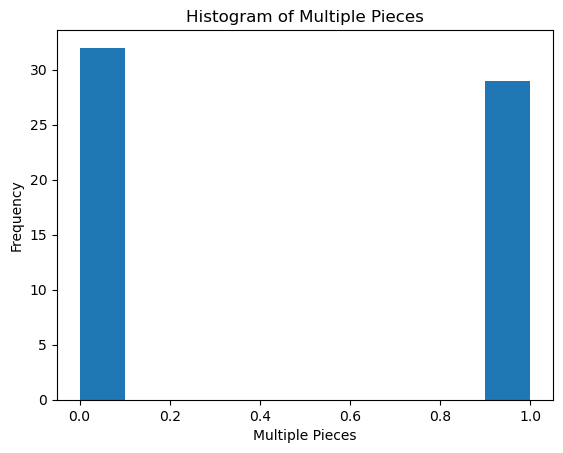

In [8]:
#Histogram for Multiple pieces
import matplotlib.pyplot as plt

# Select the column of interest
mp_col = mb['Multiple Pieces']

# Create the histogram
plt.hist(mp_col, bins=10)
plt.title('Histogram of Multiple Pieces')
plt.xlabel('Multiple Pieces')
plt.ylabel('Frequency')
plt.show()

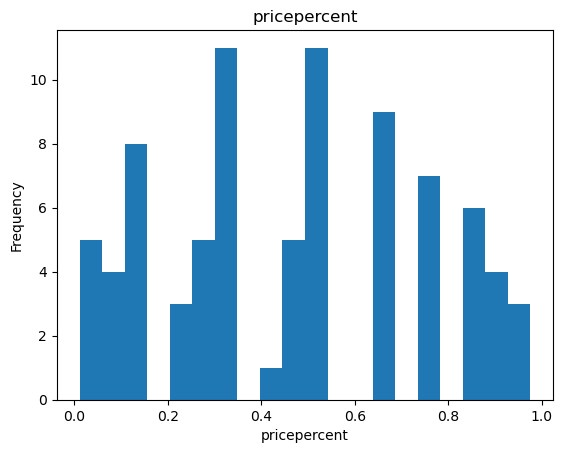

In [12]:
# Plotting a histogram  distribution of our pricepercent column 
#Histogram for Multiple pieces
import matplotlib.pyplot as plt

# Select the column of interest
mp_col = mb['pricepercent']

# Create the histogram
plt.hist(mp_col, bins=20)
plt.title('pricepercent')
plt.xlabel('pricepercent')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#As from above we notices for pricepercent column is normaly distibuted will be using mean imputation for those values

mb['pricepercent'] = mb['pricepercent'].fillna(mb['pricepercent'].mean())

In [16]:
#As from above we notices for multiple pieces column is not normaly distibuted so i will be using median imputation for those null values
mb["Multiple Pieces"] = mb['Multiple Pieces'].fillna(mb['Multiple Pieces'].median())

In [17]:
#Checking again the Sum of null values
mb.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
Multiple Pieces     0
sugarpercent        0
pricepercent        0
dtype: int64

In [18]:
# From above dataset info we notices that multiple pices is float as its in 0 and 1 we'll make it binary. 
mb["Multiple Pieces"] = mb["Multiple Pieces"].astype(int)

In [19]:
#Checking for Dupilicate Data
mb.duplicated().sum()

0

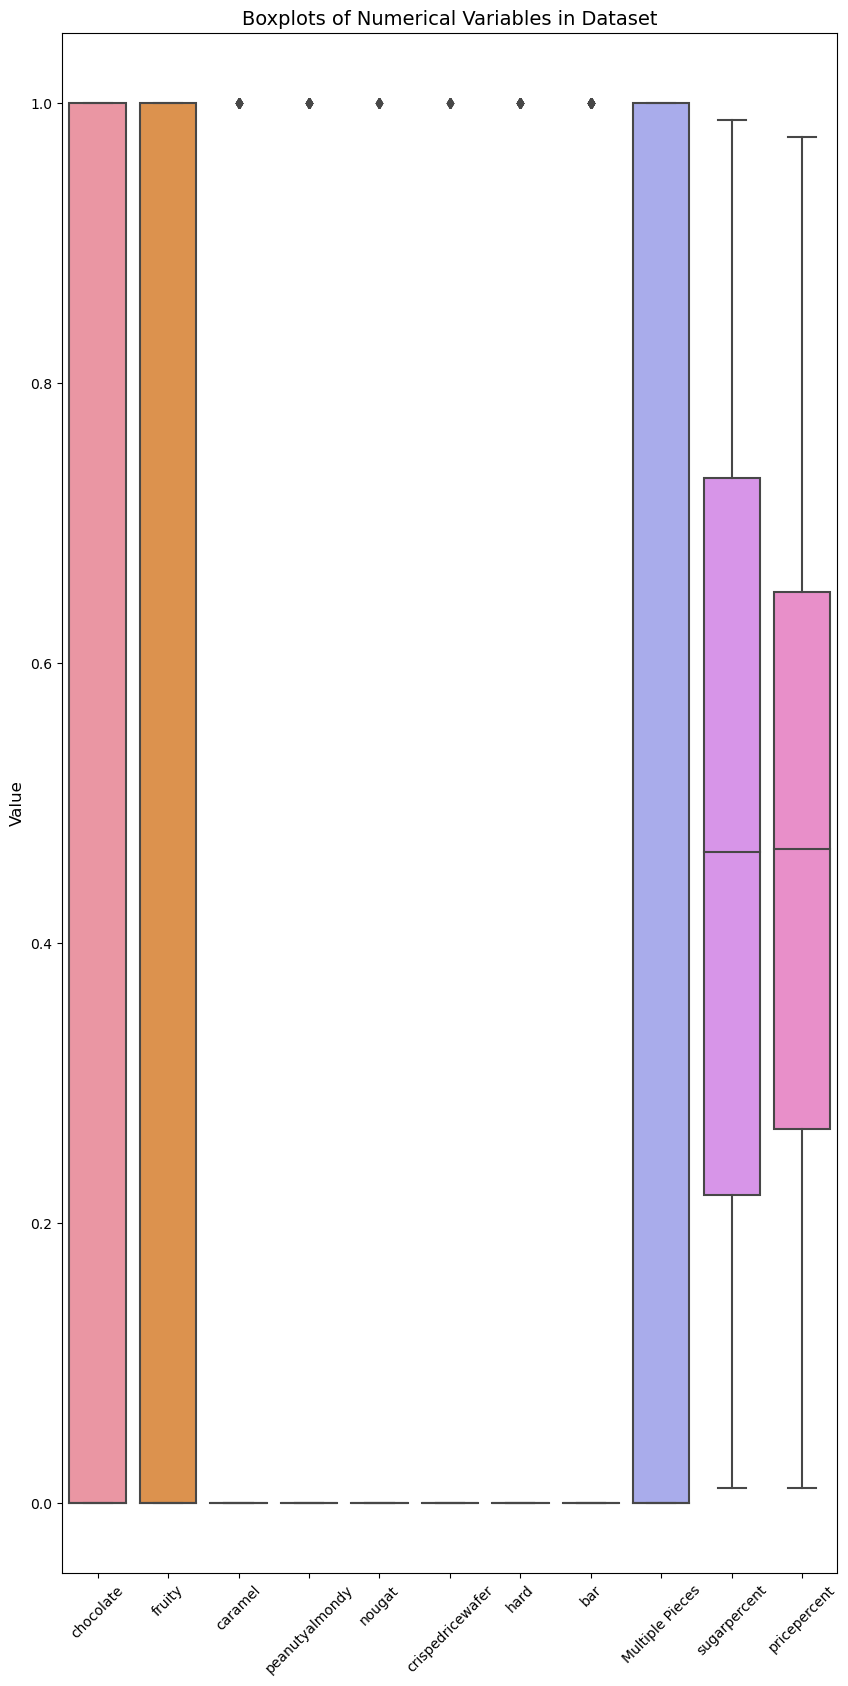

In [20]:
# Checking Outliers Boxplot for  Selected numerical columns


# Create a boxplot for each numerical column
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(data=mb, ax=ax)

# Set x-axis label rotation to 45 degrees for better readability
ax.tick_params(axis='x', rotation=45)

# Set plot title and y-axis label
ax.set_title('Boxplots of Numerical Variables in Dataset', fontsize=14)
ax.set_ylabel('Value', fontsize=12)

plt.show()

In [24]:
numerical_cols = mb.drop(columns=["competitorname"])

# Calculate and print the number of outliers for each numerical column
for col in numerical_cols:
    q1 = mb[col].quantile(0.15)
    q3 = mb[col].quantile(0.85)
    iqr = q3 - q1

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    outliers = mb[(mb[col] < lower_bound) | (mb[col] > upper_bound)]

    print("Number of outliers in column '{}': {}".format(col, len(outliers)))
    
    #There is no significant outliers and they seem relevant to the dataset

Number of outliers in column 'chocolate': 0
Number of outliers in column 'fruity': 0
Number of outliers in column 'caramel': 0
Number of outliers in column 'peanutyalmondy': 0
Number of outliers in column 'nougat': 7
Number of outliers in column 'crispedricewafer': 7
Number of outliers in column 'hard': 0
Number of outliers in column 'bar': 0
Number of outliers in column 'Multiple Pieces': 0
Number of outliers in column 'sugarpercent': 0
Number of outliers in column 'pricepercent': 0


[Text(0, 0, '64'), Text(0, 0, '21')]

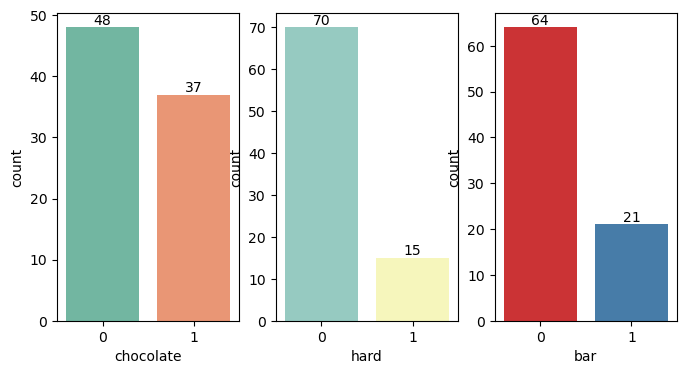

In [30]:
# Exploratory Data Analysis.

# Displaying three plots on one page.
fig, ax = plt.subplots(1, 3, figsize = (8, 4))

# PLOT FOR CHOCOLATE
choco_type = sns.countplot(x = mb["chocolate"], ax = ax[0], palette = "Set2") # ax[0] for the first plot.
# Adding labels to our barplot.
choco_type.bar_label(choco_type.containers[0])

# PLOT FOR HARD
hard_type = sns.countplot(x = mb["hard"], ax = ax[1], palette = "Set3") # ax[1] for the second plot.
# Adding labels to our barplot.
hard_type.bar_label(hard_type.containers[0])

# PLOT FOR BAR
bar_type = sns.countplot(x = mb["bar"], ax = ax[2], palette = "Set1") # ax[2] for the third plot.
# Adding labels to our barplot.
bar_type.bar_label(bar_type.containers[0])

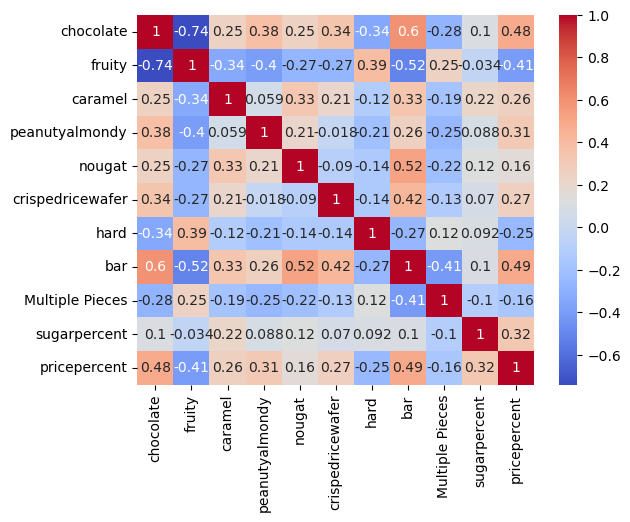

In [31]:
# Compute the correlation matrix
corr_matrix = mb.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot= True)
plt.show()

In [96]:
#checking VIF select only the numerical columns
num_cols = mb.select_dtypes(include=["float64", "int64"])

# print the list of numerical columns
print("Numerical columns:\n", num_cols.columns.tolist())

from statsmodels.stats.outliers_influence import variance_inflation_factor
# calculate the VIF for each feature for multicolinearity
vif = pd.DataFrame()
vif["Feature"] = num_cols.columns
vif["VIF"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

# print the VIF dataframe
print(vif)

Numerical columns:
 ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'Multiple Pieces', 'sugarpercent', 'pricepercent']
             Feature       VIF
0          chocolate  3.813371
1             fruity  2.730696
2            caramel  1.585026
3     peanutyalmondy  1.589082
4             nougat  2.001980
5   crispedricewafer  1.695340
6               hard  1.488328
7                bar  4.034575
8    Multiple Pieces  1.744785
9       sugarpercent  4.492220
10      pricepercent  6.102692


In [98]:
#MODELLING
X = mb.drop(['chocolate','competitorname'], axis=1)

y = mb["chocolate"]
#Split Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=5)

In [99]:
#Shape of the splits
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_train shape", y_train.shape)
print("Y_test shape", y_test.shape)

X_train shape (68, 10)
X_test shape (17, 10)
Y_train shape (68,)
Y_test shape (17,)


In [100]:
# Logistic Regression Summary Table.
log_sm = sm.add_constant(X_train)
Estimate = sm.Logit(y_train, log_sm).fit()
print(Estimate.summary())

         Current function value: 0.263196
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              chocolate   No. Observations:                   68
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                           10
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.6115
Time:                        22:50:40   Log-Likelihood:                -17.897
converged:                      False   LL-Null:                       -46.070
Covariance Type:            nonrobust   LLR p-value:                 1.769e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9084      1.051     -0.865      0.387      -2.968       1.151
fruity              -4.1076      1.402     -2.9

In [46]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train,y_train)
model.score(X_train,y_train)

0.8676470588235294

In [101]:
#Confusion Matrix
model_predict = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, model_predict))
print(classification_report(y_test,model_predict))

[[7 1]
 [1 8]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.89      0.89      0.89         9

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



In [105]:
import time

start_time = time.time()

# Run logistic regression model here
# Logisitic Regression Model.
logistic_regression = LogisticRegression()
logistic_final = logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
Y_pred = logistic_final.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", logistic_final.score(X_test, y_test))

end_time = time.time()

time_taken = end_time - start_time
print("Time taken:", time_taken)

Accuracy: 0.8235294117647058
Time taken: 0.006094217300415039


In [107]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error(MSE):%.2f' % mean_squared_error(Y_pred, y_test))

Mean Squared Error(MSE):0.18


In [109]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import time

start_time = time.time()

# Run Decision Tree model here
# Decision Tree Model.
Decision_tree = DecisionTreeClassifier(max_depth = 3)
Dmodel = Decision_tree.fit(X_train, y_train)
#Predict the response for test dataset
D_pred = Dmodel.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, D_pred))

end_time = time.time()

time_taken = end_time - start_time
print("Time taken:", time_taken)

Accuracy: 0.8823529411764706
Time taken: 0.0031099319458007812


In [110]:
#Confusion Matrix
Dmodel_predict = Dmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, model_predict))
print(classification_report(y_test,model_predict))

[[7 1]
 [1 8]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.89      0.89      0.89         9

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



In [111]:
print('Mean Squared Error(MSE):%.2f' % mean_squared_error(Dmodel_predict, y_test))

Mean Squared Error(MSE):0.12


In [126]:
import time

start_time = time.time()

# Run Random Forest model here
# Random Forest Model.
rf_model = RandomForestClassifier(min_samples_leaf = 3)
rf_model.fit(X_train, y_train)

#Predict the response for test dataset
rf_pred = rf_model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, rf_pred))

end_time = time.time()

time_taken = end_time - start_time
print("Time taken:", time_taken)

Accuracy: 0.8823529411764706
Time taken: 0.07507991790771484


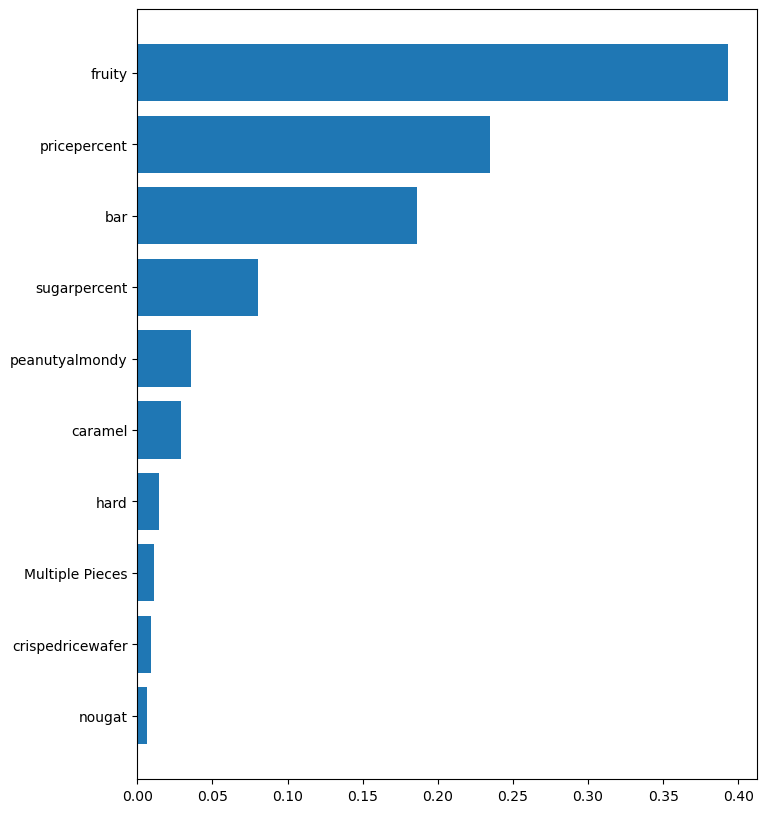

In [133]:
#important Features
feature_cols= list(X)

importances = rf_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels([feature_cols[i] for i in indices])

In [115]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, zrf_predict))
print(classification_report(y_test, zrf_predict))

[[7 1]
 [1 8]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.89      0.89      0.89         9

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



In [116]:
print('Mean Squared Error(MSE):%.2f' % mean_squared_error(zrf_predict, y_test))

Mean Squared Error(MSE):0.12


In [127]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

import time

start_time = time.time()

# Run Gradient Boosting model here
# Gradient Boosting Model.
gbm_model = GradientBoostingClassifier(n_estimators = 1000)
gbm_model.fit(X_train, y_train)

#Predict the response for test dataset
gbm_pred = gbm_model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,gbm_pred))

end_time = time.time()

time_taken = end_time - start_time
print("Time taken:", time_taken)

Accuracy: 0.7647058823529411
Time taken: 0.22954702377319336


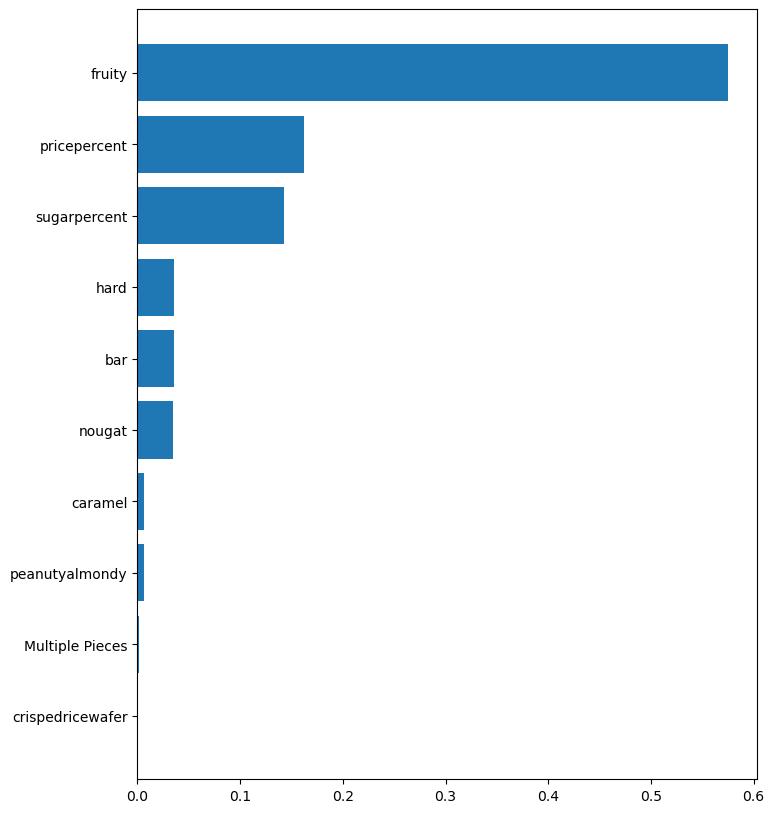

In [134]:
#important Features
feature_cols= list(X)

importances = gbm_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels([feature_cols[i] for i in indices])

In [128]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, gbm_pred))
print(classification_report(y_test, gbm_pred))

[[6 2]
 [2 7]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.78      0.78      0.78         9

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17



In [129]:
print('Mean Squared Error(MSE):%.2f' % mean_squared_error(gbm_pred, y_test))

Mean Squared Error(MSE):0.24
